In [28]:
######################## Dosage Calculator ########################
#------------------------- Colin Gordon ---------------------------
#
# Purpose:
#    This program will create an illustration of dosage of
#    medication in the body assuming the half-life measured is 
#    an exponential half-life. The user is expected to be a 
#    pharmicist or doctor with little programming knowledge
# How to use:
#    1.) run this section with IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII IMPORTS
#    2.) run the section below with FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF Functions
#    3.) run the section with MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM MAIN
#    4.) the MAIN section will start the program and ask the user for input
#
###################################################################

# IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII IMPORTS
import numpy as np
import matplotlib.pyplot as plt 
import math

In [29]:
# FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF Functions
def oneDose(timeAxis:np.array, period:float, timeRecieved:float,dose:float,expHalfLife:float):
    ##############################
    # SYNOPSIS:
    # This function calculates the effect
    # of one dose
    #
    # Description:
    # This function uses a calculation that
    # looks like this 
    # sum H(t-t_i)A_i(1/2)^((t-ti-Tj)/h)
    # where the sum is over j=0 to j_i where j_i = (t-t')/T
    # and t'=t mod T
    # A_i is the ammount of dose
    # t is the time at the moment of measure
    # ti is when the dosage is administered
    # T is the period of which doses are administered
    # h is the half life
    # H(t-t_i) is a heavy step side function where H(x) = 1 if x>=0 or H(x)=0 if x<0
    # Essentially what this function does is calculate 
    # a geometric sum of the doses administered for one dose
    # per a cycle. There is an extra condition where the dosage
    # is assumed zero at a time period before the first dose is administered
    # this number is made absurdly large by magnitude to make it easy to distinguish
    # That would be refering to all of the sub* variables. 
    #
    # [np.array] timeAxis:
    # This variable is the time positions used as your xAxis
    #
    # [float] period:
    # this is the period of which the day repeats
    #
    # [float] timeRecieved:
    # this is the time that the dose is received by the patient
    #
    # [float] dose:
    # This is the dose given to the patient at the time
    #
    # [float] expHalfLife:
    # this is (1/2)^(1/h) for simplicity was calculated in multipleDoses
    ##############################
    # This is to create a crazy dose that will be used to eliminate times that don't matter
    subTime = -100.0*period
    newTime = np.where(timeAxis<timeRecieved,subTime,timeAxis)
    
    # This is calculating the result
    discountDose=dose*expHalfLife**(-1.0*timeRecieved)
    timePrime = newTime % period
    numerator = np.where(timePrime < timeRecieved,expHalfLife**(newTime+period)-expHalfLife**(timePrime+period),expHalfLife**(newTime+period)-expHalfLife**timePrime)
    #if timePrime < timeRecieved:
    #    numerator = expHalfLife**(newTime+period)-expHalfLife**(timePrime-1.0)
    #else:
    #    numerator = expHalfLife**(newTime+period)-expHalfLife**timePrime
    denominator = expHalfLife**period - 1.0
    result = (discountDose*numerator)/denominator
    
    # The calculated dose before first dose on schedule
    subTimePrime = subTime % period
    if subTimePrime < timeRecieved:
        subNumerator = expHalfLife**(subTime+period)-expHalfLife**(subTimePrime+period)
    else:
        subNumerator = expHalfLife**(subTime+period)-expHalfLife**subTimePrime
    subResult = (discountDose*subNumerator)/denominator
    
    # removing doses that occur before first dose
    finalResult = np.where(result==subResult,0.0,result)
    
    return finalResult
def eqOneDose(timeAxis:np.array, period:float, timeRecieved:float,dose:float,expHalfLife:float):    
    ##############################
    # SYNOPSIS:
    # This function calculates the effect
    # of one dose at equilibrium
    #
    # Description:
    # This function uses a calculation that
    # looks like this 
    # sum H(t-t_i)A_i(1/2)^((t-ti-Tj)/h) 
    # where the sum is over j=0 to j_i where j_i = (t-t')/T
    # and where t -> infinity (asymptote)
    # and t'=t mod T
    # A_i is the ammount of dose
    # t is the time at the moment of measure
    # ti is when the dosage is administered
    # T is the period of which doses are administered
    # h is the half life
    # H(t-t_i) is a heavy step side function where H(x) = 1 if x>=0 or H(x)=0 if x<0
    # Essentially what this function does is calculate 
    # a geometric sum of the doses administered for one dose
    # per a cycle. There is an extra condition where the dosage
    # is assumed zero at a time period before the first dose is administered
    # this number is made absurdly large by magnitude to make it easy to distinguish
    # That would be refering to all of the sub* variables. 
    #
    # [np.array] timeAxis:
    # This variable is the time positions used as your xAxis
    #
    # [float] period:
    # this is the period of which the day repeats
    #
    # [float] timeRecieved:
    # this is the time that the dose is received by the patient
    #
    # [float] dose:
    # This is the dose given to the patient at the time
    #
    # [float] expHalfLife:
    # this is (1/2)^(1/h) for simplicity was calculated in multipleDoses
    ##############################
    # This is calculating the result
    discountDose=dose*expHalfLife**(-1.0*timeRecieved)
    timePrime = timeAxis % period
    #numerator = expHalfLife**timePrime
    numerator = np.where(timePrime < timeRecieved,expHalfLife**(timePrime+period),expHalfLife**timePrime)
    denominator = 1.0-expHalfLife**period 
    result = (discountDose*numerator)/denominator
    
    return result
    
def multipleDoses(timeAxis:np.array, period:float, timesRecieved:np.array,doses:np.array,halfLife:float):
    ##############################
    # SYNOPSIS:
    # This function calculates the effect
    # of multiple doses during a period both
    # at equilirbium and at time t
    #
    # Description:
    # This function uses a calculation that
    # looks like this 
    # sum H(t-t_i)A_i(1/2)^((t-ti-Tj)/h) 
    # where the sum is over j=0 to j_i where j_i = (t-t')/T and i =0 to n-1
    # and t'=t mod T
    # A_i is the ammount of dose
    # t is the time at the moment of measure
    # ti is when the dosage is administered
    # T is the period of which doses are administered
    # h is the half life
    # H(t-t_i) is a heavy step side function where H(x) = 1 if x>=0 or H(x)=0 if x<0
    # Essentially what this function does is calculate 
    # a geometric sum of the doses administered for one dose
    # per a cycle. There is an extra condition where the dosage
    # is assumed zero at a time period before the first dose is administered
    # this number is made absurdly large by magnitude to make it easy to distinguish
    # That would be refering to all of the sub* variables. 
    #
    # Dependencies:
    # eqOneDose,oneDose
    #
    # [np.array] timeAxis:
    # This variable is the time positions used as your xAxis
    #
    # [float] period:
    # this is the period of which the day repeats
    #
    # [float] timesRecieved:
    # these are the times that the doses are received by the patient
    #
    # [float] doses:
    # These are the doses given to the patient at the times in timesRecieved
    #
    # [float] halfLife:
    # this is h in the equation in the description. 
    ##############################
    # This condition makes sure that the timesRecieved matches the number of doses taken
    if len(timesRecieved) == len(doses):
        expHalfLife = (0.5)**(1.0/halfLife)
        sumDoses = np.zeros(len(timeAxis))
        eqDoses = np.zeros(len(timeAxis))
        for i in range(len(timesRecieved)):
            sumDoses = sumDoses + oneDose(timeAxis,period,timesRecieved[i],doses[i],expHalfLife)
            eqDoses = eqDoses + eqOneDose(timeAxis,period,timesRecieved[i],doses[i],expHalfLife)
            # Condition for timesRecieved has to be smaller than the period to be valid
            if timesRecieved[i] > period:
                appendedStr = "timesRecieved at position " + str(i)+ " is not less than the period " + str(period) + " due to the value being " + str(timesRecieved[i]) 
                fullStr = "[multipleDoses] Error: " + appendedStr
                print(fullStr)
                return None
        return [sumDoses,eqDoses]
    else:
        print("[multipleDoses] Error: the timesRecievd must have equal length to doses")
        return None
def plottingDosage(numberOfPeriods:float,period:float,timesRecieved:np.array,doses:np.array,halfLife:float):
    ##############################
    # SYNOPSIS:
    # This function calculates the effect
    # of multiple doses during a period both
    # at equilirbium and at time t
    #
    # Description:
    # This function plots a calculation that
    # looks like this 
    # sum H(t-t_i)A_i(1/2)^((t-ti-Tj)/h) 
    # where the sum is over j=0 to j_i where j_i = (t-t')/T and i =0 to n-1
    # and t'=t mod T
    # A_i is the ammount of dose
    # t is the time at the moment of measure
    # ti is when the dosage is administered
    # T is the period of which doses are administered
    # h is the half life
    # H(t-t_i) is a heavy step side function where H(x) = 1 if x>=0 or H(x)=0 if x<0
    # Essentially what this function does is plot the function above
    # that is calculated in functions multipleDoses and 
    # 
    # Dependencies:
    # multipleDoses,eqOneDose,oneDose
    #
    # [np.array] numberOfPeriods:
    # This is the number of periods that you would 
    # like to observe in your graph
    #
    # [float] period:
    # this is the period of which the day repeats
    #
    # [float] timesRecieved:
    # these are the times that the doses are received by the patient
    #
    # [float] doses:
    # These are the doses given to the patient at the times in timesRecieved
    #
    # [float] halfLife:
    # this is h in the equation in the description. 
    ##############################
    minTimeDiff = period
    if len(timesRecieved)>1:
        for i in range(1,len(timesRecieved)):
            diff = timesRecieved[i]-timesRecieved[i-1]
            if minTimeDiff>diff:
                minTimeDiff = diff
    stopTime = period*numberOfPeriods
    #startTime = -96.0 # this is to check if the graph shows zero before distribution
    startTime = 0.0 # usually want to start at initial time
    numberOfPoints = math.ceil(((stopTime-startTime)*100.0)/minTimeDiff)
    timeAxis=np.linspace(start=startTime
               , stop = stopTime
               , num=numberOfPoints
               )

    yAxis = multipleDoses(timeAxis,period,timesRecieved,doses,halfLife)
    plt.title("Dosage versus time")
    plt.xlabel("Number of Periods")
    plt.ylabel("Dosage")
    xAxis = timeAxis/period
    plt.plot(xAxis,yAxis[0],xAxis,yAxis[1])
    plt.legend(["Actual Dosage","Equilibrium Dosage"])
    plt.savefig('Dosage_Graph.png')
    plt.show()
    

How long is a period of doses (usually 24 hours): 24
How many periods would you like to observe: 30
What is the half life of medicine (in same units as period): 75
How many Doses per a period: 2
When is the 1st dose taken: 0
How much is the 1st dose (in standard units like mg): 2
When is the 2nd dose taken: 16
How much is the 2nd dose (in standard units like mg): 2


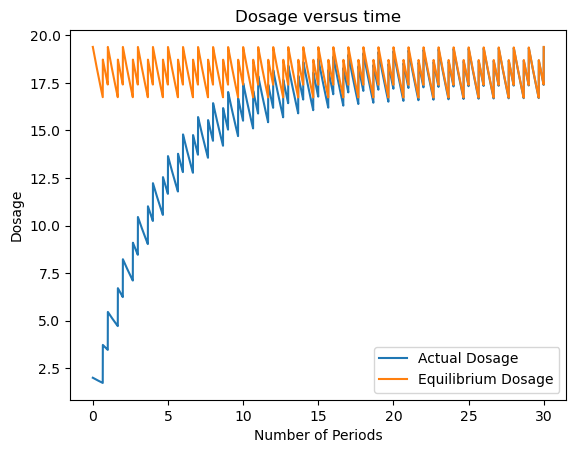

In [30]:
# MMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMM MAIN
# The periodMain is the period of which the cycle of doses are taken (ussually a day)
periodMain = input("How long is a period of doses (usually 24 hours): ")
# numberOfPeriodsMain is the number of periods graphed
numberOfPeriodsMain = input("How many periods would you like to observe: ")
# This is the exponential half life of the medication
halfLifeMain = float(input("What is the half life of medicine (in same units as period): "))
# this is the number of doses per a period
numberOfDoses = int(input("How many Doses per a period: "))

# creating arrays with the given number of doses
# timesRecievedMain is the time during the period that the dose is taken (0 at beginning of day, 16 at night)
timesRecievedMain = np.zeros(numberOfDoses)
# dosesMain is the amount in a standard unit like moles or mass. 
dosesMain = np.zeros(numberOfDoses)
# This creates the input for each dose the user gives the patient
if numberOfDoses > 1:
    for i in range(numberOfDoses):
        j = i+1
        if j == 1:
            inputRecStr = "When is the 1st dose taken: "
            inputDosStr = "How much is the 1st dose (in standard units like mg): "
        elif j==2:
            inputRecStr = "When is the 2nd dose taken: "
            inputDosStr = "How much is the 2nd dose (in standard units like mg): "
        elif j==3:
            inputRecStr = "When is the 3rd dose taken: "
            inputDosStr = "How much is the 3rd dose (in standard units like mg): "
        else:
            inputRecStr = "When is the "+str(j)+"th dose taken : "
            inputDosStr = "How much is the "+str(j)+"th dose (in standard units like mg): "
        timesRecievedMain[i]=float(input(inputRecStr))
        dosesMain[i]  = float(input(inputDosStr))
else:
    inputRecStr = "When is the dose taken: "
    inputDosStr = "How much is the dose (in standard units like mg): "
    timesRecievedMain[0]=float(input(inputRecStr))
    dosesMain[0]  = float(input(inputDosStr))
# this plots the dosage
plottingDosage(float(numberOfPeriodsMain),float(periodMain),timesRecievedMain,dosesMain,halfLifeMain)